In [19]:
#Download the training data and the labels

import os

case3_dir = r'C:\Users\Thi\Desktop\ohsumed-first-20000-docs'
train_dir = os.path.join(case3_dir, 'training')

labels = []
texts = []

label_list = [label for label in os.listdir(train_dir)]

for label_type in label_list:
    dir_name = os.path.join(train_dir, label_type)
    print(label_type, len(os.listdir(dir_name)))
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        labels.append(label_list.index(label_type))

C01 423
C02 158
C03 65
C04 1163
C05 283
C06 588
C07 100
C08 473
C09 125
C10 621
C11 162
C12 491
C13 281
C14 1249
C15 215
C16 200
C17 295
C18 388
C19 191
C20 525
C21 546
C22 92
C23 1799


In [20]:
#Preprocess integer labels into one-hot tensor labels

from keras.utils.np_utils import to_categorical
import numpy as np

labels = np.asarray(labels)
labels = to_categorical(labels)
print('Shape of labels tensor:', labels.shape)

Shape of labels tensor: (10433, 23)


In [21]:
#Preprocess word data into integer tensors
#Each sample is zero-padded to length "maxlen"
#Only "max_words" most frequent words are taken into account

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 300 # common length of all the samples
max_words = 20000 # number of different word indices

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen)

print('Shape of data tensor:', data.shape)

Found 30857 unique tokens
Shape of data tensor: (10433, 300)


In [22]:
#Shuffle the training data 

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [23]:
#Build and compile the network model

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

model = Sequential()
model.add(Embedding(max_words, 69, input_shape=(maxlen,)))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(69, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(46, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(23, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 69)           1380000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               68000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 69)                6969      
_________________________________________________________________
dropout_8 (Dropout)          (None, 69)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 46)                3220      
_________________________________________________________________
dropout_9 (Dropout)          (None, 46)                0         
__________

In [24]:
#Fit the model to training data

history = model.fit(data, labels, 
                    epochs = 20, batch_size = 64,
                   validation_split=0.1)

Train on 9389 samples, validate on 1044 samples
Epoch 1/20
9389/9389 [==============================] - 179s 19ms/step - loss: 2.9182 - acc: 0.1463 - val_loss: 2.8314 - val_acc: 0.1762
Epoch 2/20
9389/9389 [==============================] - 169s 18ms/step - loss: 2.7756 - acc: 0.1672 - val_loss: 2.7969 - val_acc: 0.1849
Epoch 3/20
9389/9389 [==============================] - 159s 17ms/step - loss: 2.6880 - acc: 0.1849 - val_loss: 2.7103 - val_acc: 0.2146
Epoch 4/20
9389/9389 [==============================] - 114s 12ms/step - loss: 2.5983 - acc: 0.2251 - val_loss: 2.7202 - val_acc: 0.2328
Epoch 5/20
9389/9389 [==============================] - 113s 12ms/step - loss: 2.5300 - acc: 0.2443 - val_loss: 2.7229 - val_acc: 0.2366
Epoch 6/20
9389/9389 [==============================] - 114s 12ms/step - loss: 2.4727 - acc: 0.2664 - val_loss: 2.6975 - val_acc: 0.2375
Epoch 7/20
9389/9389 [==============================] - 123s 13ms/step - loss: 2.4233 - acc: 0.2717 - val_loss: 2.6713 - val_acc: 

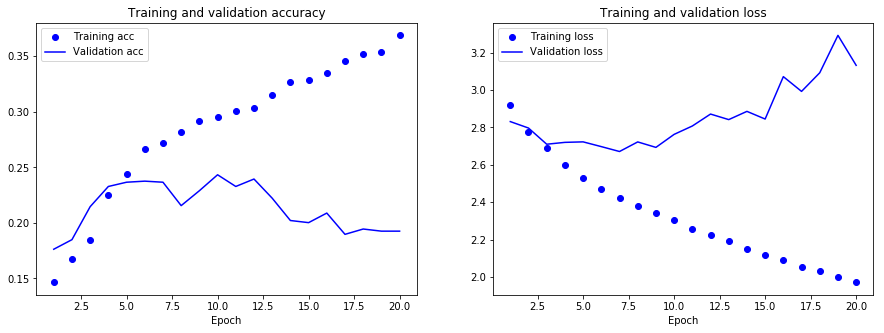

In [25]:
#Plot the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [26]:
preprocess test data

test_dir = os.path.join(case3_dir, 'test')

test_labels = []
test_texts = []

for label_type in label_list:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        test_texts.append(f.read())
        f.close()
        test_labels.append(label_list.index(label_type))

test_sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
test_labels = np.asarray(test_labels)
y_test = to_categorical(test_labels)

In [27]:
#Evaluate model with test data

model.evaluate(x_test, y_test)

12733/12733 [==============================] - 46s 4ms/step


[2.7251761425583489, 0.23977067463201185]

In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score

In [29]:
# Calculate the predictions
predictions = model.predict(data)
y_pred = np.argmax(predictions, axis = 1)

In [30]:
# Confusion matrix
cm = confusion_matrix(labels, y_pred)
print(np.array2string(cm, max_line_width = 100))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
# Classification results per class
print(classification_report(labels, y_pred))